<a href="https://colab.research.google.com/github/MichalBerg99/MachineLearning/blob/main/ML_Suicide_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Gets data for scandinavian countries
df = pd.read_csv('data/suicide_data.csv')
df = df.loc[(df['country'] == 'Norway') | (df['country'] == 'Sweden') | (df['country'] == 'Denmark')]

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
7418,Denmark,1994,male,75+ years,89,131700,67.58,Denmark1994,NaN,"156,162,311,732",32034,G.I. Generation
7419,Denmark,1994,male,55-74 years,189,448200,42.17,Denmark1994,NaN,"156,162,311,732",32034,Silent
7420,Denmark,1994,male,35-54 years,279,755600,36.92,Denmark1994,NaN,"156,162,311,732",32034,Boomers
7421,Denmark,1994,female,75+ years,70,230600,30.36,Denmark1994,NaN,"156,162,311,732",32034,G.I. Generation
7422,Denmark,1994,male,25-34 years,85,414100,20.53,Denmark1994,NaN,"156,162,311,732",32034,Boomers


In [ ]:
# Change names of the columns
df.columns=["country","year","gender","age_group","suicide_number","population","sui_pop","country_year","hdi","gdp_for_year","gdp_per_capita","generation"]

In [ ]:
df.drop(["country_year","gdp_for_year","generation","sui_pop","hdi"],axis=1,inplace=True)
df.head()

,country,year,gender,age_group,suicide_number,population,gdp_per_capita
7418,Denmark,1994,male,75+ years,89,131700,32034
7419,Denmark,1994,male,55-74 years,189,448200,32034
7420,Denmark,1994,male,35-54 years,279,755600,32034
7421,Denmark,1994,female,75+ years,70,230600,32034
7422,Denmark,1994,male,25-34 years,85,414100,32034


In [ ]:
df.age_group.unique()

array(['75+ years', '55-74 years', '35-54 years', '25-34 years',
       '15-24 years', '5-14 years'], dtype=object)

In [ ]:
df["age_group"].value_counts()

75+ years      164
55-74 years    164
35-54 years    164
25-34 years    164
15-24 years    164
5-14 years     162
Name: age_group, dtype: int64

In [ ]:
df.describe()

,year,suicide_number,population,gdp_per_capita
count,982.000000,982.000000,9.820000e+02,982.000000
mean,2001.910387,71.368635,5.024974e+05,49344.443992
std,8.246713,73.606667,2.713664e+05,22039.607859
min,1986.000000,0.000000,1.028000e+05,20117.000000
25%,1995.000000,17.250000,3.139108e+05,32246.000000
50%,2002.000000,52.000000,4.337905e+05,41099.000000
75%,2009.000000,102.000000,6.089402e+05,61863.000000
max,2016.000000,394.000000,1.299990e+06,109804.000000


In [ ]:
# Checks how many values are set to null, should be zero
df.isnull().sum()

country           0
year              0
gender            0
age_group         0
suicide_number    0
population        0
gdp_per_capita    0
dtype: int64

In [ ]:
# Sorts tabel by suicuide number and age group
df = df.sort_values(by=["suicide_number","age_group"], ascending=False)

df.head()

,country,year,gender,age_group,suicide_number,population,gdp_per_capita
24369,Sweden,1987,male,35-54 years,394,1124000,22813
24382,Sweden,1988,male,35-54 years,394,1140400,25731
24441,Sweden,1993,male,35-54 years,385,1214000,25880
24395,Sweden,1989,male,35-54 years,381,1157700,26978
24418,Sweden,1991,male,35-54 years,375,1189400,33623


In [ ]:
# Resets index, giving us a descending order of max suicide to min suicide
df.reset_index(inplace=True,drop=True)
df.head()

,country,year,gender,age_group,suicide_number,population,gdp_per_capita
0,Sweden,1987,male,35-54 years,394,1124000,22813
1,Sweden,1988,male,35-54 years,394,1140400,25731
2,Sweden,1993,male,35-54 years,385,1214000,25880
3,Sweden,1989,male,35-54 years,381,1157700,26978
4,Sweden,1991,male,35-54 years,375,1189400,33623


In [ ]:
df.corr()

,year,suicide_number,population,gdp_per_capita
year,1.000000,-0.088172,0.081589,0.787501
suicide_number,-0.088172,1.000000,0.706751,-0.156210
population,0.081589,0.706751,1.000000,-0.100961
gdp_per_capita,0.787501,-0.156210,-0.100961,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Converts string categorical variables into numerical variables
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

df = Encoder(df)

In [ ]:
df.head()

,country,year,gender,age_group,suicide_number,population,gdp_per_capita
0,2,1987,1,2,394,1124000,22813
1,2,1988,1,2,394,1140400,25731
2,2,1993,1,2,385,1214000,25880
3,2,1989,1,2,381,1157700,26978
4,2,1991,1,2,375,1189400,33623


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Input data
X = df.drop(columns=['suicide_number'])

# Ouput data
y = df['suicide_number']

In [ ]:
# Split data set into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(len(X_train))

# Defines our random forest pipeline
random_forest_pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', RandomForestRegressor())])
random_forest_pipeline.verbose = True
random_forest_fitted = random_forest_pipeline.fit(X_train, y_train)

r2_random_forest = random_forest_pipeline.score(X_test, y_test)

# Prints the R squared score
print(f"R_sqared score: {r2_random_forest}")

random_forest_predict = random_forest_pipeline.predict(X_test)

785
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.3s
R_sqared score: 0.973823637618269


In [ ]:
import xgboost as xgb 

# Defines our xgboost regressor pipeline
xgboost_regressor_pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', (xgb.XGBRegressor()))])
xgboost_regressor_pipeline.verbose = True
xgboost_regressor_pipeline.fitted = xgboost_regressor_pipeline.fit(X_train, y_train)

# Calculates the R squared score for the xgb regressor model
r2_xgboost_regressor = xgboost_regressor_pipeline.score(X_test, y_test);

print(f"R_squared score: {r2_xgboost_regressor}")

xgb_regressor_predict = xgboost_regressor_pipeline.predict(X_test)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[11:58:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
R_squared score: 0.9604646345916488


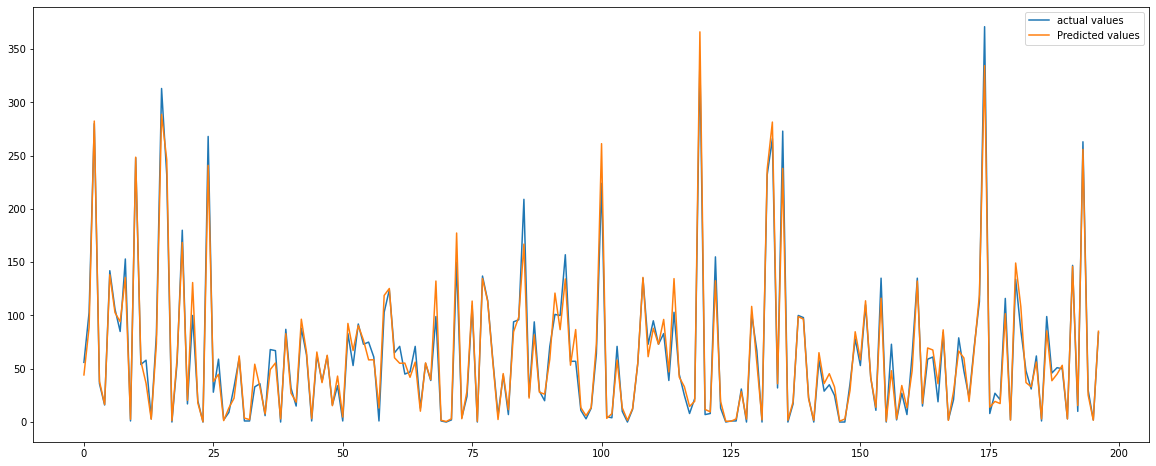

In [ ]:
import matplotlib.pyplot as plt

# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the predicted value and actual value, using the random_forest predictions 
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))], random_forest_predict, label="Predicted values")

# showing the plotting
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

# Prints the MAE, MSE, RMSE and R2 score

def evaluate_regression(y, y_pred):
    
    mae = MAE(y, y_pred)
    mse = MSE(y, y_pred)
    rmse = mse ** (1/2)
    r2 = r2_score(y, y_pred)
    
    print('Regression result')
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R_squared: {r2:.5f}")

# Evaluates our regression model
evaluate_regression(y_test, random_forest_predict)

Regression result
MAE: 7.57
MSE: 127.38
RMSE: 11.29
R_squared: 0.97382


In [ ]:
 # pip install shap

In [ ]:
import shap

# Fits the explainer using the fitted random_forest 
explainer = shap.Explainer(random_forest_fitted.predict, X_test)


# Calculates the SHAP values
shap_values = explainer(X_test)

Exact explainer: 198it [00:17,  4.85it/s]                         


In [ ]:
shap_values

.values =
array([[-7.35923833e+00, -4.15442167e+00,  1.87669600e+01,
         6.00308167e+00, -3.10116050e+01, -3.17597667e+00],
       [ 4.83200833e+00, -2.80338333e+00,  2.16257367e+01,
         2.04855700e+01, -1.16198233e+01, -8.72130833e+00],
       [ 4.70740500e+00, -1.10812500e+01,  5.09909600e+01,
         2.11710850e+01,  1.51375112e+02,  1.45488333e-01],
       ...,
       [-9.08591500e+00, -4.60792000e+00,  1.63706683e+01,
        -6.21689333e+00, -3.34750133e+01, -2.67612667e+00],
       [ 4.02621000e+00,  4.76945667e+00, -2.05847950e+01,
        -2.31394217e+01, -2.98595217e+01,  1.35687167e+00],
       [ 3.98017833e+00,  4.67482500e+00,  2.39978567e+01,
         1.42127333e+01, -2.99118400e+01,  3.11504667e+00]])

.base_values =
array([65.1412, 65.1412, 65.1412, 65.1412, 65.1412, 65.1412, 65.1412,
       65.1412, 65.1412, 65.1412, 65.1412, 65.1412, 65.1412, 65.1412,
       65.1412, 65.1412, 65.1412, 65.1412, 65.1412, 65.1412, 65.1412,
       65.1412, 65.1412, 65.1412, 65.

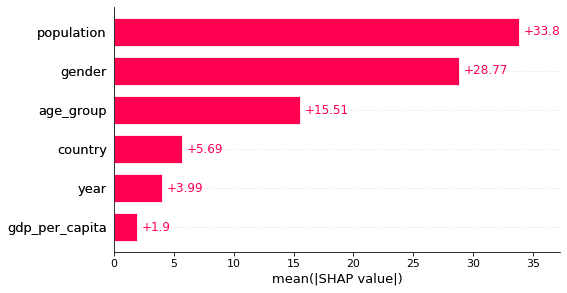

In [ ]:
shap.plots.bar(shap_values)

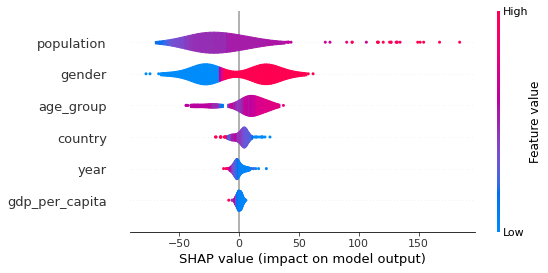

In [ ]:
# Violin plot of the SHAP values
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    weights = []
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")
        weights.append(v)
    return weights

In [ ]:
weights = print_feature_importances_shap_values(shap_values, ['country','year','gender','age_group','population','gdp_per_capita'])

population -> 33.8003 (softmax = 0.9935)
gender -> 28.7748 (softmax = 0.0065)
age_group -> 15.5100 (softmax = 0.0000)
country -> 5.6858 (softmax = 0.0000)
year -> 3.9891 (softmax = 0.0000)
gdp_per_capita -> 1.8985 (softmax = 0.0000)


In [ ]:
ODI_runs = {'name': ['population', 'gender', 'age_group', 
                      'country','year','gdp_per_capita'], 
            'weight': weights} 
dg = pd.DataFrame(ODI_runs)  
  
# create a new column of percentile rank
dg['Percentile Rank'] = dg.weight.rank(pct = True)
  
# displaying the percentile rank
display(dg) 

,name,weight,Percentile Rank
0,population,33.800304,1.000000
1,gender,28.774760,0.833333
2,age_group,15.510048,0.666667
3,country,5.685801,0.500000
4,year,3.989098,0.333333
5,gdp_per_capita,1.898465,0.166667


In [ ]:
# import module
import numpy as np

p_rank = dg['Percentile Rank']
weight = weights

svi = 0;
for i in range(6):
  svi +=  p_rank[i] * weight[i];
print(svi/100)

0.7260831358714042
